In [1]:
import heapq
import sys
from collections import defaultdict, namedtuple
import matplotlib.pyplot as plt
from IPython.display import display, HTML


In [4]:
class HuffmanNode:
    def __init__(self, char=None, freq=None):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    # Định nghĩa so sánh cho heapq (min-heap)
    def __lt__(self, other):
        return self.freq < other.freq


def calculate_frequency(data):
    freq = defaultdict(int)
    for char in data:
        freq[char] += 1
    return freq


def build_huffman_tree(freq):
    heap = [HuffmanNode(char, freq) for char, freq in freq.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        node1 = heapq.heappop(heap)
        node2 = heapq.heappop(heap)
        merged = HuffmanNode(freq=node1.freq + node2.freq)
        merged.left = node1
        merged.right = node2
        heapq.heappush(heap, merged)

    return heapq.heappop(heap)


def build_codes_tree(node, current_code='', codes={}):
    if node is None:
        return

    if node.char is not None:
        codes[node.char] = current_code

    build_codes_tree(node.left, current_code + '0', codes)
    build_codes_tree(node.right, current_code + '1', codes)
    return codes


def huffman_encoding(data):
    if not data:
        return "", None

    freq = calculate_frequency(data)
    huffman_tree = build_huffman_tree(freq)
    huffman_codes = build_codes_tree(huffman_tree)

    encoded_data = ''.join([huffman_codes[char] for char in data])
    return encoded_data, huffman_tree


def huffman_decoding(encoded_data, huffman_tree):
    if not encoded_data or huffman_tree is None:
        return ""

    decoded_data = []
    current_node = huffman_tree
    for bit in encoded_data:
        if bit == '0':
            current_node = current_node.left
        else:
            current_node = current_node.right

        if current_node.char is not None:
            decoded_data.append(current_node.char)
            current_node = huffman_tree

    return ''.join(decoded_data)



Test Case 1


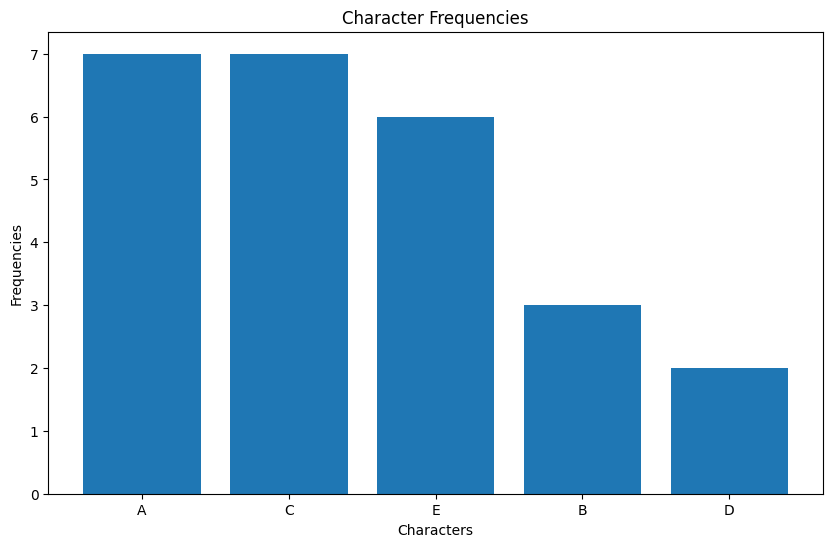


Test Case 2



Test Case 3


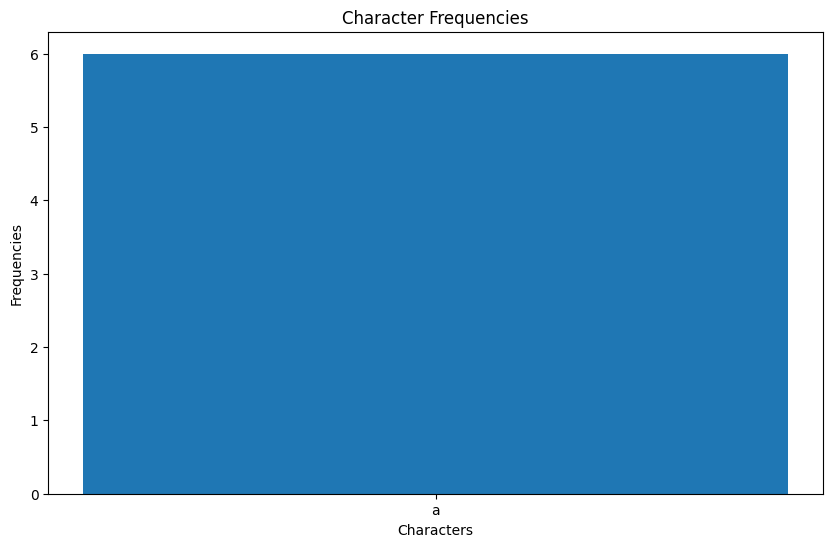


Test Case 4


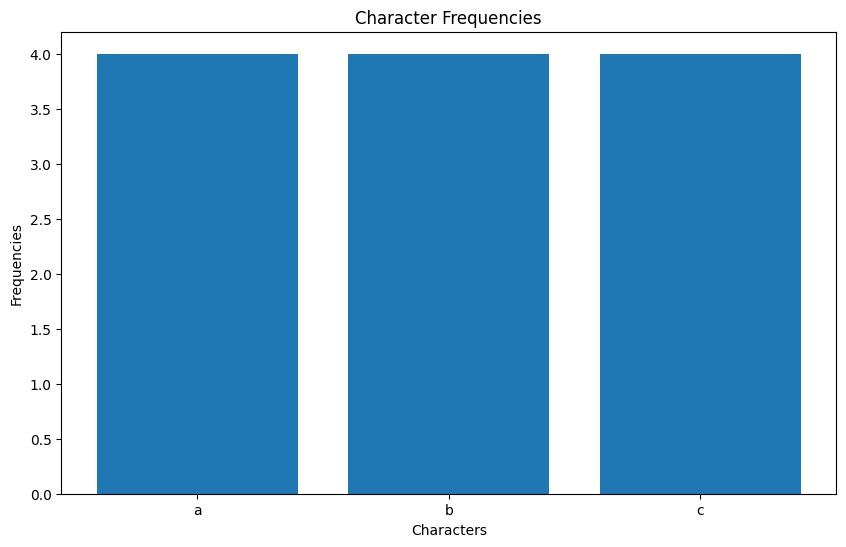


Test Case 5


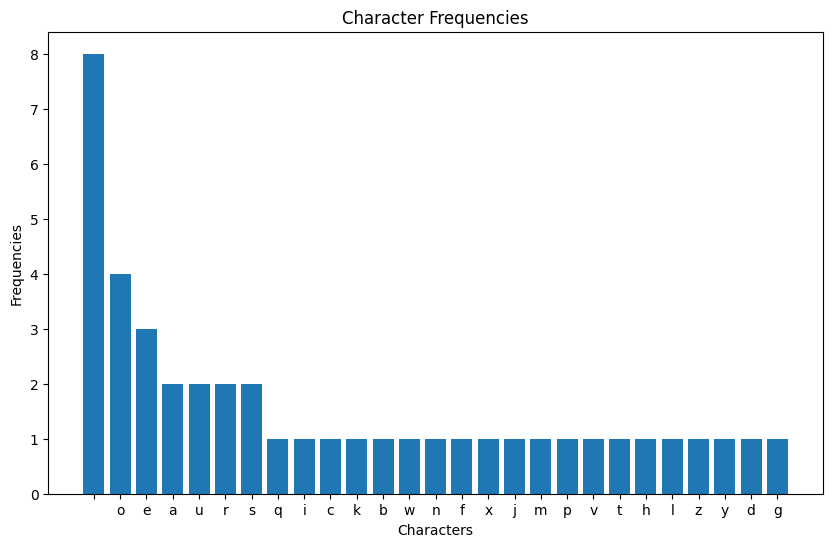


Test Case 6


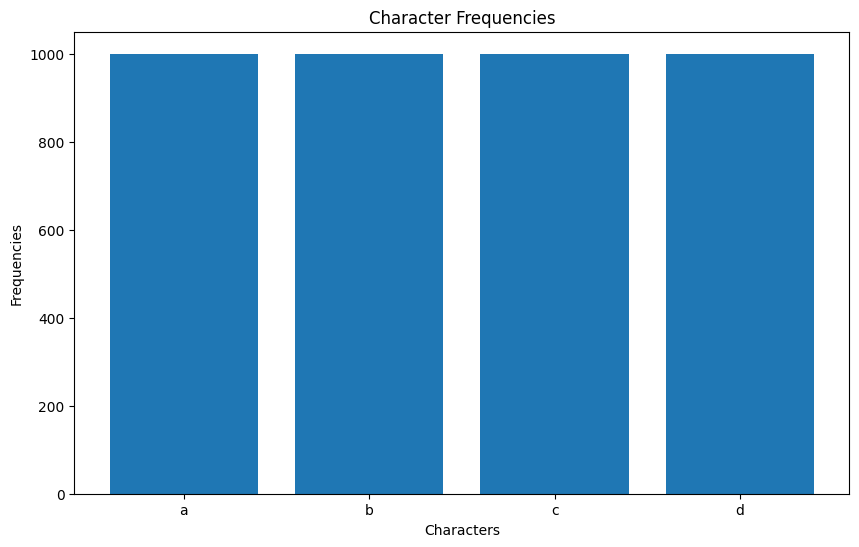

In [5]:
def visualize_huffman(data):
    encoded_data, tree = huffman_encoding(data)

    if not data:
        display(HTML("<h3>Input data is empty.</h3>"))
        return

    display(HTML(f"<h3>Original data: {data}</h3>"))
    display(HTML(f"<h3>Encoded data: {encoded_data}</h3>"))

    decoded_data = huffman_decoding(encoded_data, tree)
    display(HTML(f"<h3>Decoded data: {decoded_data}</h3>"))

    freq = calculate_frequency(data)
    sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

    plt.figure(figsize=(10, 6))
    plt.bar([char for char, _ in sorted_freq], [freq for _, freq in sorted_freq])
    plt.title('Character Frequencies')
    plt.xlabel('Characters')
    plt.ylabel('Frequencies')
    plt.show()


def run_visualization_tests():
    test_cases = [
        # Câu ví dụ, bao gồm cả các giá trị lớn, trống, và lặp lại
        "AAAAAAABBBCCCCCCCDDEEEEEE",
        "",
        "aaaaaa",
        "abcabcabcabc",
        "a quick brown foxes jumps over the lazy dog",
        "abcd" * 1000
    ]

    for i, test in enumerate(test_cases, 1):
        print(f"\nTest Case {i}")
        visualize_huffman(test)


run_visualization_tests()
